In [1]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [2]:
%cd  /gdrive/My\ Drive/Colab\ Notebooks/FARS
!pwd

/gdrive/My Drive/Colab Notebooks/FARS
/gdrive/My Drive/Colab Notebooks/FARS


In [23]:
import pandas as pd
import copy
import requests
import zipfile
import os
import matplotlib.pyplot as plt

In [4]:
def download_all_data():
  year = 1975
  while year <=2020:

    if (not os.path.exists(str(year))):
        os.mkdir(str(year))

    url = f"https://static.nhtsa.gov/nhtsa/downloads/FARS/{year}/National/FARS{year}NationalCSV.zip"

    r = requests.get(url)

    if r.status_code == 200:
        zipf = f"{year}/{url.split('/')[-1]}"

        with open(zipf, "wb") as fo:
            fo.write(r.content)

            # unzip
            zipfile.ZipFile(zipf).extractall(str(year)) 
    year = year + 1
download_all_data()

In [24]:
def get_all_years_accident_df():
  accidents_df = None
  year = 2004
  while year <=2008:
    file_paths = [os.path.join("./", str(year), "ACCIDENT.CSV") ,
                  os.path.join("./", str(year), "ACCIDENT.csv"),
                  os.path.join("./", str(year), "accident.CSV"),
                  os.path.join("./", str(year), "accident.csv")]
    for file_path in file_paths:
      if os.path.exists(file_path):
        df = pd.read_csv(file_path, encoding="ISO-8859-1")
        break
    if accidents_df is None:
      accidents_df = df
    else: 
      accidents_df = accidents_df.append(df)
    year = year + 1
  return accidents_df
all_years_accidents_df = get_all_years_accident_df()

In [25]:
def get_all_years_person_df():
  accidents_df = None
  year = 2004
  while year <=2008:
    file_paths = [os.path.join("./", str(year), "PERSON.CSV") ,
                  os.path.join("./", str(year), "PERSON.csv"),
                  os.path.join("./", str(year), "person.CSV"),
                  os.path.join("./", str(year), "person.csv")]
    for file_path in file_paths:
      if os.path.exists(file_path):
        df = pd.read_csv(file_path, encoding="ISO-8859-1")
        df['Year'] = [year]*len(df)
        break
    if accidents_df is None:
      accidents_df = df
    else: 
      accidents_df = accidents_df.append(df)
    year = year + 1
  return accidents_df
all_years_person_df = get_all_years_person_df()

In [7]:
'''Recreate the graph (with actual FARS data) in Figure 15. You do not need to show the Kansas data. BONUS (up to to
3 points extra): You will earn up to 3 bonus points added to this assignment if you access the KARS data set and perform the
same analysis (in other words, you cannot just put the numbers in figure 15 in the graph and earn the bonus)'''

'Recreate the graph (with actual FARS data) in Figure 15. You do not need to show the Kansas data. BONUS (up to to\n3 points extra): You will earn up to 3 bonus points added to this assignment if you access the KARS data set and perform the\nsame analysis (in other words, you cannot just put the numbers in figure 15 in the graph and earn the bonus)'

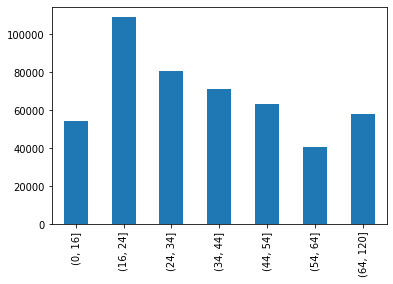

In [26]:
def analyze_age(a_all_years_person_df):
  pd.cut(a_all_years_person_df.loc[:,'AGE'],
        [0, 16, 24, 34, 44, 54, 64, 120]
        ) \
      .value_counts() \
      .sort_index() \
      .plot(kind='bar')
analyze_age(copy.deepcopy(all_years_person_df))

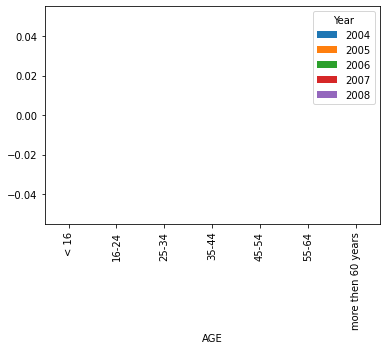

In [27]:
def analyze_age_yearly(a_all_years_person_df):
  a_all_years_person_df['Count'] = [0] * len(a_all_years_person_df)
  bins = [0, 16, 24, 34, 44, 54, 64, 120]

  bins_list = ["< 16","16-24","25-34","35-44", "45-54", "55-64", "more then 60 years"] 
  a_all_years_person_df['AGE'] = pd.cut(a_all_years_person_df['AGE'],  bins, labels=bins_list)

  a_all_years_person_df = a_all_years_person_df.groupby(['Year', 'AGE']).agg({'Count':'sum'}).reset_index()
  a_all_years_person_df = a_all_years_person_df.pivot("AGE", "Year", "Count")
  a_all_years_person_df.plot(kind='bar')

analyze_age_yearly(copy.deepcopy(all_years_person_df))


In [10]:
 ### Recreate Figure 4 and Figure 9.

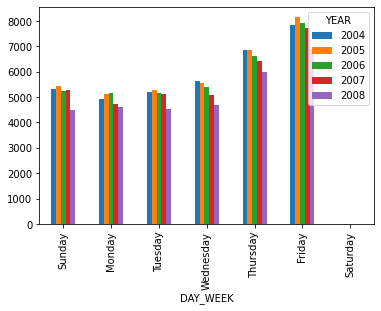

In [30]:
def analyze_day_year(a_all_years_accidents_df):
  a_all_years_accidents_df  = a_all_years_accidents_df[a_all_years_accidents_df['FATALS'] > 0 ]
  bins = [1, 2, 3, 4, 5, 6, 7, 8]
  bins_list = ["Sunday","Monday","Tuesday","Wednesday", "Thursday", "Friday", "Saturday"] 
  a_all_years_accidents_df['DAY_WEEK'] = pd.cut(a_all_years_accidents_df['DAY_WEEK'], 
                                                                  bins, labels=bins_list)

  a_all_years_accidents_df = a_all_years_accidents_df.groupby(['YEAR', 'DAY_WEEK']).agg({'FATALS':'sum'}).reset_index()
  a_all_years_accidents_df = a_all_years_accidents_df.pivot("DAY_WEEK", "YEAR", "FATALS")
  a_all_years_accidents_df.plot(kind='bar')
analyze_day_year(copy.deepcopy(all_years_accidents_df))

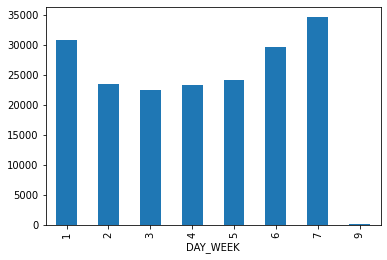

In [31]:
def analyze_day(a_all_years_accidents_df):
  a_all_years_accidents_df  = a_all_years_accidents_df[a_all_years_accidents_df['FATALS'] > 0 ]
  a_all_years_accidents_df = a_all_years_accidents_df.groupby(a_all_years_accidents_df['DAY_WEEK']).DAY.count()

  a_all_years_accidents_df.plot(x='DAY_WEEK' , kind='bar')
analyze_day(copy.deepcopy(all_years_accidents_df))

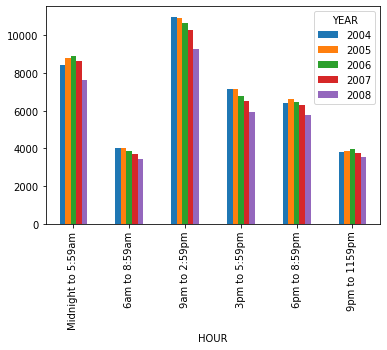

In [32]:
def analyze_time_yearly(a_all_years_accidents_df):
  a_all_years_accidents_df  = a_all_years_accidents_df[a_all_years_accidents_df['FATALS'] > 0 ]
  bins = [0, 6,  9, 15, 18, 21, 24]
  bins_list = ["Midnight to 5:59am",
               "6am to 8:59am",
               "9am to 2:59pm",
               "3pm to 5:59pm",
               "6pm to 8:59pm",
               "9pm to 1159pm"] 
  a_all_years_accidents_df['HOUR'] = pd.cut(a_all_years_accidents_df['HOUR'], 
                                                                  bins, labels=bins_list)

  a_all_years_accidents_df = a_all_years_accidents_df.groupby(['YEAR', 'HOUR']).agg({'FATALS':'sum'}).reset_index()
  a_all_years_accidents_df = a_all_years_accidents_df.pivot("HOUR", "YEAR", "FATALS")
  a_all_years_accidents_df.plot(kind='bar')
analyze_time_yearly(copy.deepcopy(all_years_accidents_df))


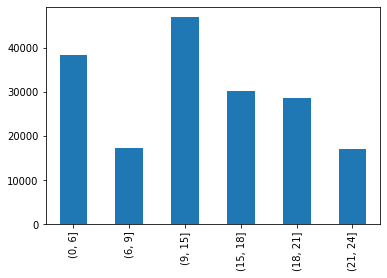

In [33]:
def analyze_time(a_all_years_accidents_df):
  a_all_years_accidents_df  = a_all_years_accidents_df[a_all_years_accidents_df['FATALS'] > 0 ]
  pd.cut(a_all_years_accidents_df.loc[:,'HOUR'],
      [0, 6, 9, 15, 18, 21, 24]
      ) \
    .value_counts()\
    .sort_index() \
    .plot(kind='bar')
analyze_time(copy.deepcopy(all_years_accidents_df))

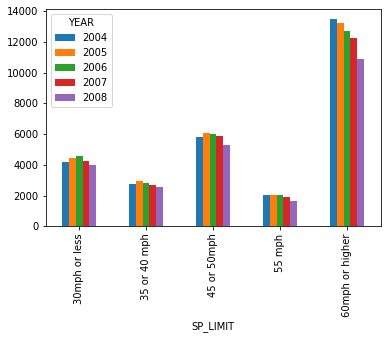

In [34]:
def analyze_speed_limit_yearly(a_all_years_accidents_df):
  a_all_years_accidents_df  = a_all_years_accidents_df[a_all_years_accidents_df['FATALS'] > 0 ]
  bins = [30, 35, 40, 45, 50, 55]
  bins_list = ["30mph or less",
               "35 or 40 mph",
               "45 or 50mph",
               "55 mph",
               "60mph or higher"] 
  a_all_years_accidents_df['SP_LIMIT'] = pd.cut(a_all_years_accidents_df['SP_LIMIT'], 
                                                                  bins, labels=bins_list)

  a_all_years_accidents_df = a_all_years_accidents_df.groupby(['YEAR', 'SP_LIMIT']).agg({'FATALS':'sum'}).reset_index()
  a_all_years_accidents_df = a_all_years_accidents_df.pivot("SP_LIMIT", "YEAR", "FATALS")
  a_all_years_accidents_df.plot(kind='bar')

analyze_speed_limit_yearly(copy.deepcopy(all_years_accidents_df))



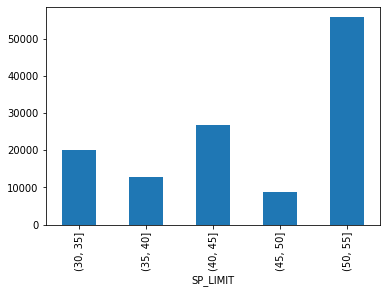

In [35]:
def analyze_speed_limit(a_all_years_accidents_df):
  a_all_years_accidents_df  = a_all_years_accidents_df[a_all_years_accidents_df['FATALS'] > 0 ]
  bins = [30, 35, 40, 45, 50, 55]
  a_all_years_accidents_df = a_all_years_accidents_df.groupby(pd.cut(a_all_years_accidents_df['SP_LIMIT'], bins=bins)).SP_LIMIT.count()

  a_all_years_accidents_df.plot(x='SP_LIMIT' , kind='bar')
analyze_speed_limit(copy.deepcopy(all_years_accidents_df))

In [17]:

#Take the data from Figure 4 and Figure 9 and combine them. What you will end up with is
#a grouping by age band, then by time of day. Your final graph will be able to answer questions
#about which age group is more or less likely to experience a pedestrian fatality during which time
#of day

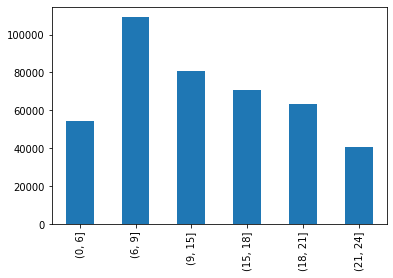

In [36]:
def analyze_time_age(a_all_years_accidents_df, a_all_years_person_df):
  pd.cut(a_all_years_person_df.loc[:,'AGE'],
        [0, 16, 24, 34, 44, 54, 64, 120]
        ) \
      .value_counts() \
      .sort_index() \
      .plot(kind='bar')

  
  a_all_years_accidents_df  = a_all_years_accidents_df[a_all_years_accidents_df['FATALS'] > 0 ]
  pd.cut(a_all_years_accidents_df.loc[:,'HOUR'],
      [0, 6, 9, 15, 18, 21, 24]
      ) \
    .value_counts()\
    .sort_index() \
    .plot(kind='bar')

analyze_time_age((copy.deepcopy(all_years_accidents_df)),(copy.deepcopy(all_years_person_df)) )